In [ ]:
import pandas as pd
import numpy as np

path ="/content/drive/MyDrive/AmEx Strategy Track/AmEx Strategy Track train data csv.csv"

data = pd.read_csv(path)

Press ```Ctrl + F9``` after adding path

##DATA ANALYSIS

###Default Rate: ```(No.of defaulters in a specific month)/(Total No. of people in a specific month)```

We need to observe surge in default rate

In [ ]:
train_set = data

#divided dataset into two parts based on default index:

default_0 = train_set[train_set['default_ind'] == 0]
default_1 = train_set[train_set['default_ind'] == 1]

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62484 entries, 0 to 62483
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unique_identifier      62484 non-null  int64  
 1   appl_month             62484 non-null  object 
 2   prod_name              62484 non-null  object 
 3   acq_channel            62484 non-null  object 
 4   state_code             62484 non-null  object 
 5   bureau_src             62484 non-null  object 
 6   risk_score_1           62484 non-null  float64
 7   bureau_score           62484 non-null  int64  
 8   limit                  62484 non-null  int64  
 9   income                 62484 non-null  int64  
 10  old_open_trd_ms        62484 non-null  int64  
 11  no_open_trd            62484 non-null  int64  
 12  no_trd                 62484 non-null  int64  
 13  debt_cap               62484 non-null  float64
 14  basic_max_trd_tnr      62484 non-null  int64  
 15  ba

```creating dataset for plotting default rate```

In [ ]:
# Calculate the number of enteries for each month:

entry_counts = train_set['appl_month'].value_counts()

# Calculate the number of 1s for each month:
ones_count = train_set[train_set['default_ind'] == 1]['appl_month'].value_counts()

#creating a dataset to calculate default rate:
ratio_df = pd.DataFrame({
    'Month': entry_counts.index,
    'Entries': entry_counts.values,
    'Ones': ones_count.reindex(entry_counts.index, fill_value=0).values
})  # Fill NaN values with 0 in case some months don't have 1s

# Calculate the ratio of number of 1s to number of entries
ratio_df['default_rate'] = ratio_df['Ones'] / ratio_df['Entries']

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical type with the defined order
ratio_df['Month'] = pd.Categorical(ratio_df['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
ratio_df = ratio_df.sort_values('Month')

```plotting```

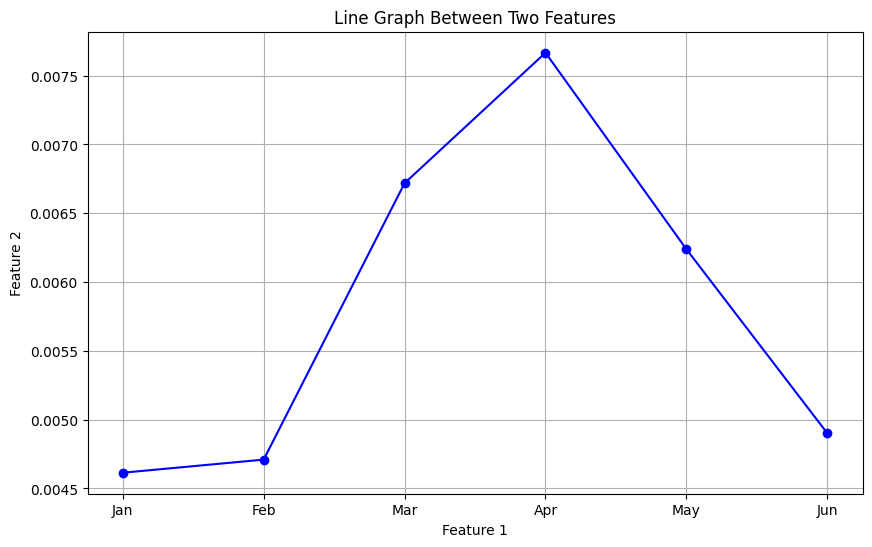

In [ ]:
feature_1 = ratio_df['Month']
feature_2 = ratio_df['default_rate']

import matplotlib.pyplot as plt



# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(feature_1, feature_2, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Line Graph Between Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show grid
plt.grid(True)

# Show the plot
plt.show()


#### We observed that there is a significant surge in the months of Mar and Apr

```We will now compare feature trends of Mar-Apr with other months to devise a strategy to find fraudsters.```

In [ ]:
# Creating datasets:

defaulters_mar_apr_may = default_1[(default_1['appl_month'] == 'Mar') | (default_1['appl_month'] == 'Apr') | (default_1['appl_month'] == 'May') | (default_1['appl_month'] == 'Jun')]


# defaulters_other = train_set[(train_set['appl_month'] != 'Mar') & (train_set['appl_month'] != 'Apr') & (train_set['appl_month'] != 'May')]
defaulters_other = default_1[(default_1['appl_month'] != 'Mar') & (default_1['appl_month'] != 'Apr') & (default_1['appl_month'] != 'May') & (default_1['appl_month'] != 'Jun')]

Creating a Correlation Matrix to find rankings of features on the basis of their dependancies

In [ ]:
# We need to first drop non-integral features to create a corr_matrix (like appl_month , mercant ids etc)

train_set_corr = train_set.drop(columns=['dl_id' ,'unique_identifier','appl_month', 'prod_name', 'acq_channel', 'state_code',
                                            'bureau_src', 'trust_identity', 'addr_mismatch' , 'merchant1' , 'merchant2' , 'merchant3'])

In [ ]:
corr_matrix = train_set_corr.corr()
corr_matrix['default_ind'].sort_values(ascending = False)

,default_ind
default_ind,1.000000
return_payments,0.171647
risk_score_2,0.084192
risk_score_3,0.078721
risk_score_7,0.066788
merchant1_amt,0.054036
merchant2_amt,0.047185
decline_txn,0.043275
spend,0.042908
uid_addr_matches,0.041220


Based on the correlational values , we will assign weights to the features later.

```dropping irrelevant features to plot graphs for only important features```

In [ ]:
defaulters_mar_apr_may = defaulters_mar_apr_may.drop(columns=['dl_id' ,'unique_identifier','appl_month', 'prod_name', 'acq_channel', 'state_code',
                                            'bureau_src', 'trust_identity', 'addr_mismatch' , 'merchant1' , 'merchant2' , 'merchant3'])

defaulters_other = defaulters_other.drop(columns=['dl_id' ,'unique_identifier','appl_month', 'prod_name', 'acq_channel', 'state_code',
                                            'bureau_src', 'trust_identity', 'addr_mismatch' , 'merchant1' , 'merchant2' , 'merchant3'])

###plotting graphs

In [ ]:
# import matplotlib.pyplot as plt

# def plot_histogram(dfs, feature_name, dataset_names):
#     plt.figure(figsize=(12, 8))

#     colors = ['b', 'g', 'r']  # List of colors for different datasets
#     alpha = 0.5  # Transparency level

#     for df, color, name in zip(dfs, colors, dataset_names):
#         plt.hist(df[feature_name], bins=30, edgecolor='k', color=color, alpha=alpha, label=name)

#     plt.title(f'Histogram of {feature_name}')
#     plt.xlabel('Value')
#     plt.ylabel('Frequency')
#     plt.legend()
#     plt.show()

In [ ]:
defaulters_mar_apr_may.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 2 to 62364
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   risk_score_1           266 non-null    float64
 1   bureau_score           266 non-null    int64  
 2   limit                  266 non-null    int64  
 3   income                 266 non-null    int64  
 4   old_open_trd_ms        266 non-null    int64  
 5   no_open_trd            266 non-null    int64  
 6   no_trd                 266 non-null    int64  
 7   debt_cap               266 non-null    float64
 8   basic_max_trd_tnr      266 non-null    int64  
 9   basic_no_trd           266 non-null    int64  
 10  risk_score_2           266 non-null    float64
 11  risk_score_3           266 non-null    int64  
 12  no_inq                 266 non-null    int64  
 13  risk_score_4           266 non-null    int64  
 14  income_incons          266 non-null    float64
 15  bureau_mi

In [ ]:
# List of features to plot (excluding non-numerical columns)
# numerical_features = [
#     'risk_score_1', 'bureau_score', 'limit', 'income', 'old_open_trd_ms',
#     'no_open_trd', 'no_trd', 'debt_cap', 'basic_max_trd_tnr', 'basic_no_trd',
#     'risk_score_2', 'risk_score_3', 'no_inq', 'risk_score_4', 'income_incons',
#     'bureau_mismatch', 'risk_score_5', 'risk_score_6', 'basic_old_open_trd_ms',
#     'addr_ds', 'addr_changes', 'no_phn_to_addr', 'no_nid_to_addr',
#     'no_uid_to_addr', 'uid_addr_matches', 'uid_nid_matches', 'home_value',
#     'no_addr_to_nid', 'risk_score_7', 'no_trd_del', 'spend', 'payments',
#     'return_payments', 'attempt_txn', 'decline_txn', 'merchant1_amt',
#     'merchant1_ten', 'merchant1_cat', 'merchant2_amt',
#     'merchant2_ten', 'merchant2_cat', 'merchant3_amt',
#     'merchant3_ten', 'merchant3_cat', 'risk_score_8', 'risk_score_9',
#     'risk_score_10', 'risk_score_11'
# ]


# numerical_features = [
#     'risk_score_1','old_open_trd_ms',

#      'risk_score_3', 'risk_score_5','basic_old_open_trd_ms',
#      'risk_score_11'
# ]

numerical_features = [
'risk_score_1', 'limit','old_open_trd_ms','risk_score_3',
                       'basic_old_open_trd_ms', 'addr_ds', 'no_addr_to_nid', 'risk_score_7','risk_score_11'

]

In [ ]:
# dataset_names = ['defaulters_mar_apr_may', 'defaulters_other']
# dataframes = [defaulters_mar_apr_may , defaulters_other]

# # Iterate over the numerical features and plot histograms
# for fea in numerical_features:
#   plot_histogram(dataframes, fea, dataset_names)

On the Basis of the above graphs determine threshold values to identify fraudsters, and store in on some word file or txt file for future use.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature name that you want to plot
for feature in numerical_features:
  feature_name = feature

# Create a figure
  plt.figure(figsize=(10, 6))

# Plot density plot for the first dataset
  sns.kdeplot(defaulters_mar_apr_may[feature_name], shade=True, color='blue', label='defaulters_mar_apr_may')

# Plot density plot for the second dataset
  sns.kdeplot(defaulters_other[feature_name], shade=True, color='red', label='defaulters_other')

# Add labels and title
  plt.xlabel('Feature Value')
  plt.ylabel('Density')
  plt.title(feature_name)

# Add a legend
  plt.legend()

# Show the plot
  plt.show()


```decision tree```

In [ ]:
training_class = train_set[['old_open_trd_ms' ,
        'risk_score_3',
        'basic_old_open_trd_ms' ,
        'risk_score_11',
        'no_addr_to_nid']]

testing_class = train_set[['default_ind']]

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(training_class, testing_class)

# Make predictions
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))


DecisionTreeClassifier()

In [ ]:
from sklearn.tree import export_text

# Assuming `clf` is your trained DecisionTreeClassifier
tree_rules = export_text(clf, feature_names=[
'old_open_trd_ms' ,
        'risk_score_3',
        'basic_old_open_trd_ms' ,
        'risk_score_11',
        'no_addr_to_nid'
])
print(tree_rules)


In [ ]:
# import pandas as pd

# def apply_strategy(data: pd.DataFrame) -> pd.DataFrame:
#     # Define normalized weights and their conditions for the specified features
#     weights = {
#         'risk_score_1': (0.2045, lambda x: x < 1),  # Feature with its weight and condition
#         'old_open_trd_ms': (0.0354, lambda x: x > 250),  # Feature with its weight and condition
#         'risk_score_3': (0.5447, lambda x: x > 90),  # Feature with its weight and condition
#         'basic_old_open_trd_ms': (0.0639, lambda x: x > 200),  # Feature with its weight and condition
#         'risk_score_11': (0.1526, lambda x: x > 0.32)  # Feature with its weight and condition
#     }

#     def calculate_strategy_hit(row: pd.Series) -> int:
#         val = 0
#         for feature, (weight, condition) in weights.items():
#             if feature in row and condition(row[feature]):
#                 val += weight
#         return 1 if val > 0.3 else 0

#     # Apply the function to each row in the DataFrame
#     data['strategy_hit'] = data.apply(calculate_strategy_hit, axis=1)

#     return data


In [ ]:
# default_1 = apply_strategy(default_1)

In [ ]:
# default_1['strategy_hit'].value_counts()

In [ ]:
# train_set = data

In [ ]:
# train_set.rename(columns={'pred_default_ind':'default_ind'}, inplace=True)

In [ ]:
# import pandas as pd

# def apply_strategy(data: pd.DataFrame) -> pd.DataFrame:
#     # Define normalized weights and their conditions for the specified features
#     weights = {
#         'risk_score_1': (0.2045, lambda x: x < 1),  # Feature with its weight and condition
#         'old_open_trd_ms': (0.0354, lambda x: x > 250),  # Feature with its weight and condition
#         'risk_score_3': (0.5447, lambda x: x > 90),  # Feature with its weight and condition
#         'basic_old_open_trd_ms': (0.0639, lambda x: x > 200),  # Feature with its weight and condition
#         'risk_score_11': (0.1526, lambda x: x > 0.32)  # Feature with its weight and condition
#     }

#     def calculate_strategy_hit(row: pd.Series) -> int:
#         if row['pred_default_ind'] == 0:
#             return 0

#         val = 0
#         for feature, (weight, condition) in weights.items():
#             if feature in row and condition(row[feature]):
#                 val += weight
#         return 1 if val > 0.3 else 0

#     # Apply the function to each row in the DataFrame
#     data['strategy_hit'] = data.apply(calculate_strategy_hit, axis=1)

#     return data


In [ ]:
import pandas as pd

def apply_strategy(data: pd.DataFrame) -> pd.DataFrame:
    # Define normalized weights and their conditions for the specified features
    weights = {
        # 'risk_score_1': (0.1055, lambda x: x < 1),  # Feature with its weight and condition
        'old_open_trd_ms': (0.0182, lambda x: x > 250),  # Feature with its weight and condition
        'risk_score_3': (0.2797, lambda x: x > 90),  # Feature with its weight and condition
        'basic_old_open_trd_ms': (0.0329, lambda x: x > 200),  # Feature with its weight and condition
        'risk_score_11': (0.0782, lambda x: x > 0.32),  # Feature with its weight and condition
        # 'addr_ds': (0.0270, lambda x: x > 4000),  # Feature with its weight and condition
        'no_addr_to_nid': (0.0984, lambda x: x > 25),  # Feature with its weight and condition
        # 'risk_score_7': (0.2370, lambda x: x > 475)  # Feature with its weight and condition
    }

    def calculate_strategy_hit(row: pd.Series) -> int:
        if row.get('pred_default_ind', 1) == 0:
            return 0

        val = 0
        for feature, (weight, condition) in weights.items():
            if feature in row and condition(row[feature]):
                val += weight
        return 1 if val > 0.15 else 0

    # Apply the function to each row in the DataFrame
    data['strategy_hit'] = data.apply(calculate_strategy_hit, axis=1)

    return data


In [ ]:
# train_set = apply_strategy(train_set)

In [ ]:
# train_set['strategy_hit'].value_counts()

,count
strategy_hit,
0,62431
1,53


In [ ]:
# sub1 = train_set[['unique_identifier','strategy_hit']]

In [ ]:
# sub1['no_of_vars'] = 5

<ipython-input-38-4dc2a43c9b6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['no_of_vars'] = 5


In [ ]:
# sub1.head()

,unique_identifier,strategy_hit,no_of_vars
0,116356,0,5
1,110872,0,5
2,158686,0,5
3,148772,0,5
4,158473,0,5


In [ ]:
# sub1.to_csv('r3_submission_aditya.jha.csv',index=False)